# Simple Linear Regression - Gauss Markov Theorem

### California Test Score Data Set

The California Standardized Testing and Reporting data set contains data on test performance, school characteristics, and student demographic backgrounds. 

Test scores are the average of the reading and math scores. The student–teacher ratio used here is the number of students in the district divided by the number of full-time equivalent teachers.

The demographic variables include the percentage of students who are in the public assistance program CalWorks, the percentage of students who qualify for a reduced-price lunch, and the percentage of students who has English as a second language.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

In [32]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf

In [20]:
df = pd.read_excel("caschool.xlsx")
df

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000


## OLS Estimator

First run the simple linear regression model

$$ TestScore_i = \beta_0 + \beta_1 STR_i + u_i $$

In [21]:
formula = 'testscr ~ str'              # Regression formula where y = Test Score and X = Student-Teacher Ratio

model = smf.ols(formula, df).fit()     # Running the regression

In [22]:
print(model.summary())                 # Print out the result of the regression

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           2.78e-06
Time:                        12:39:08   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.0

The resulting estimated model is

$$ TestScore_i = 698.9 - 2.28 STR_i $$
$$ \hspace{0.5in}   (9.47) \hspace{0.15in} (0.48)$$

## Binary Regressor

Assume a binary regressor <b>str_20</b> that presents the value 1 if $STR_i \leq 20$ and 0 if $STR_i > 20$

First, we need to create this new variable in our data frame

In [23]:
df["str_20"] = np.where(df.str <= 20.0, 1, 0)
df.head()

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,str_20
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,1
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,0
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,1
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,1
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024,1


Then we will run a regression with a binary regressor <b>str_20</b> such that

$$ TestScore_i = \beta_0 + \beta_1 STR\_20_i + u_i $$

In [24]:
formula_20 = 'testscr ~ str_20'

model_20 = smf.ols(formula_20, df).fit()
print(model_20.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     15.05
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           0.000121
Time:                        12:39:12   Log-Likelihood:                -1825.9
No. Observations:                 420   AIC:                             3656.
Df Residuals:                     418   BIC:                             3664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.9994      1.409    461.414      0.0

## Heteroskedasticity

Back to the simple linear regression model

$$ TestScore_i = \beta_0 + \beta_1 STR_i + u_i $$

The resulting estimated model is

$$ TestScore_i = 698.9 - 2.28 STR_i $$
$$ \hspace{0.5in}   (9.47) \hspace{0.15in} (0.48)$$

Let's plot the residuals of this regression to check for heteroskedasticity.

More on regression plots with <b>statsmodels</b> can be found in the documentation [here](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html).

Text(0, 0.5, 'Residuals')

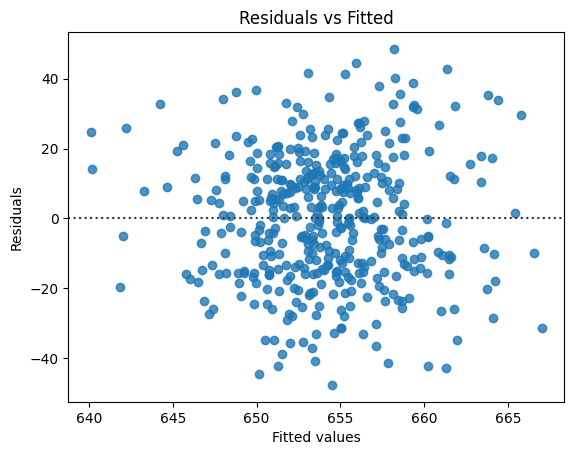

In [29]:
# Residual Plot to investigate for the presence of Heteroskedasticity

residual_plot = plt.figure()
sns.residplot(data=df, x=model.fittedvalues, y='testscr')

residual_plot.axes[0].set_title('Residuals vs Fitted')
residual_plot.axes[0].set_xlabel('Fitted values')
residual_plot.axes[0].set_ylabel('Residuals')

We can see that the residuals does not appear to be scattered randomly with respect to the fitted values and therefore, there is indication of heteroskedasticity.

We can also conduct the <b>Breusch-Pagan Test</b> for heteroskedasticity.

In [34]:
# Conducting the Breusch-Pagan Test for heteroskedasticity

name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']

test = smd.het_breuschpagan(model.resid, model.model.exog)

lzip(name, test)

[('Lagrange multiplier statistic', 5.793597081600083),
 ('p-value', 0.016084644856556283),
 ('f-value', 5.846658967717417),
 ('f p-value', 0.01603333958939678)]

Next, we produce heteroskedasticity-robust standard errors.

In [ ]:
model_hr = smf.ols(formula, df).fit(cov_type = "HC0")     # Running the regression with heteroskedasticity-robust standard errors
print(model_hr.summary())                                 # Print out the result of the regression

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.35
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.38e-05
Time:                        22:55:31   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.340     67.597      0.0